In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,"../") 
from codes.functions.check_policy import load_info
import numpy as np
import qutip as qt
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import HTML
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes, InsetPosition, BboxPatch, BboxConnector
import seaborn as sns
import matplotlib.gridspec as gridspec
#matplotlib.use('module://ipykernel.pylab.backend_inline')
from cycler import cycler
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects
import matplotlib
from cycler import cycler
from IPython.display import SVG 
import scipy
import pandas as pd



plt.style.use('seaborn') 
fontsize = 12

mpl_settings = {
    'text.usetex': False,
    'font.family': 'sans-serif',
    'pgf.texsystem': 'pdflatex',
    'font.size': fontsize,
    
    'axes.labelsize': fontsize,               # -> axis labels
    'legend.fontsize': fontsize,              # -> legends
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'ytick.major.size': 3,
    'xtick.major.size': 3,
    'axes.linewidth': 2,
    'axes.edgecolor': "0.15",
    'figure.dpi': 300
}


plt.rcParams.update(mpl_settings)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from matplotlib.font_manager import findfont, FontProperties
font = findfont(FontProperties(family=['sans-serif']))
font

'/zeropoint/u/pori/conda-envs/conda_env/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

# Figure 4

In [8]:
rhos_cumulative = np.load("data/rhos_superpos.npy")
#probabilities_cumulative= np.load("data/probabilities_superpos.npy")
#actions_cumulative = np.load("data/actions_superpos.npy")
fidelities_cumulative = np.load("data/fidelities_superpos.npy")
num_traj=0
rhos_1_3 = np.load("data/rhos_superpos_1_3.npy")
probabilities_1_3 = np.load("data/probs_superpos_1_3.npy")
actions_1_3 = np.load("data/actions_superpos_1_3.npy")
fidelities_1_3 = np.load("data/fidelities_superpos_1_3.npy")
observations_1_3 = np.load("data/observations_superpos_1_3.npy")

rhos_phases = np.load("data/rhos_different_phases_4.npy")

states_ = [
    [0,3],
    [1,3],
    [3,2],
    [0,2],
    [1,0],
    [1,2]
]

best_fidelities_cumulative = np.zeros((4,4))
for state_ in states_:
    best_fidelities_cumulative[state_[0], state_[1]]=fidelities_cumulative.mean(axis=2)[:, :, -1][state_[0], state_[1]]



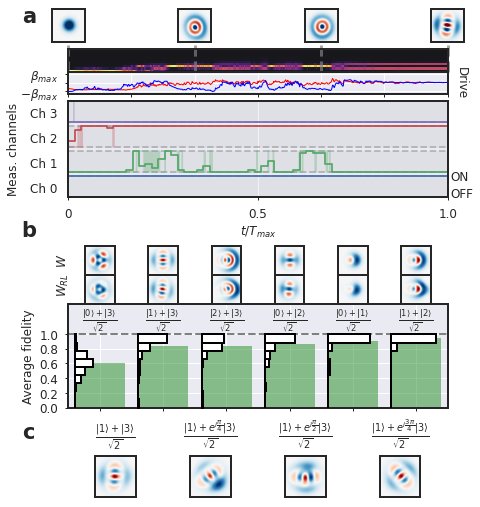

In [9]:
%matplotlib inline
scale = 1.7
fig = plt.figure(figsize=(4*scale, 5*scale), frameon=False)

main_grid = fig.add_gridspec(3, 1, height_ratios=[1, 1, 1/4], hspace=0.4)
gs = main_grid[1].subgridspec(22, 18, hspace=0, wspace=0)





subax1 = np.zeros(len(states_), dtype=object)
subax2 = np.zeros(len(states_), dtype=object)
for index, state_ in enumerate(states_):
    subax1[index] = plt.subplot(gs[:4,index*3:index*3+3])
    subax2[index] = plt.subplot(gs[4:8,index*3:index*3+3])
ax = plt.subplot(gs[8:,:])
    
    
gs = main_grid[0].subgridspec(22, 8, hspace=0, wspace=0)
ax_prob_3 = fig.add_subplot(gs[2:5, :])
ax_actions_3 = fig.add_subplot(gs[5:8, :], sharex = ax_prob_3)
axes_meas = fig.add_subplot(gs[9:, :])


colors = dict(matplotlib.colors.TABLEAU_COLORS, **matplotlib.colors.CSS4_COLORS)
color = matplotlib.colors.to_rgba(colors["forestgreen"])
new_color = list(color[:3]) +  [0.5]

ax.yaxis.set(ticks=[0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.setp(ax_prob_3.get_xticklabels(), visible=False)
plt.setp(ax_actions_3.get_xticklabels(), visible=False)

ax.hlines(1, -0.5, 5.5, linestyle="dashed", color="gray", lw=2)
for index, state_ in enumerate(states_):
    ax.bar(index, best_fidelities_cumulative[state_[0], state_[1]],
           color=new_color,
        
           #edgecolor="ForestGreen", 
           linewidth=5)
    state1 = min(state_[0], state_[1])
    state2 = max(state_[0], state_[1])
    ax.text(index, 
             1.15,
             #best_fidelities_cumulative[state_[0], state_[1]]+0.04, 
             r"$\frac{{|{{{0}}}\rangle+|{{{1}}}\rangle}}{{\sqrt{{2}}}}$".format(state1, state2),
             horizontalalignment="center",
             clip_on=False,
            fontsize=fontsize
    
            )


   

    subax1[index].set_xticks([])
    subax1[index].set_yticks([])
    
    subax2[index].set_xticks([])
    subax2[index].set_yticks([])

    xwginer=np.linspace(-3,3,100)
    wigner = qt.wigner((qt.fock(20,state_[0])+qt.fock(20,state_[1])).unit().proj(),
    
                       xwginer, xwginer  )
    im_wigner = subax1[index].imshow(wigner,
                cmap="RdBu", vmin=-np.max(np.abs(wigner)), vmax=np.max(np.abs(wigner)))
    
    


    xwginer=np.linspace(-3,3,100)
    #wigner = qt.wigner((qt.fock(20,state_[0])+qt.fock(20,state_[1])).unit().proj(),
    wigner = qt.wigner(qt.Qobj(rhos_cumulative[state_[0], state_[1], :].mean(axis=0)),
                       xwginer, xwginer )
    im_wigner = subax2[index].imshow(wigner,
                cmap="RdBu", vmin=-np.max(np.abs(wigner)), vmax=np.max(np.abs(wigner)))
    
    bars = [rect for rect in ax.get_children() if isinstance(rect, matplotlib.patches.Rectangle)]

    patch = bars[index]
    
    #ax.vlines(index-0.47, 0, 1, lw=2, color="k")
    
    
#plt.bar(np.arange(1,8,1), [x["probs_final"][-1] for x in summaries], color="green", alpha=0.4)
ax.set_ylim(0.,1.4)
ax.set_xlim(-0.5,5.5)


ax.set_ylabel(r"Average fidelity")
ax_actions_3.set_ylabel(r"Drive", rotation=270, labelpad=20)
ax_actions_3.yaxis.set_label_position("right")

axes_meas.set_ylabel(r"Meas. channels", labelpad=48)

ax.xaxis.set(ticklabels=[])
# for i in range(7):   
#     coeff=0.103
#     subax = fig.add_axes([0.16+coeff*(i),0.125,0.08,0.755] )  
#     sns.distplot(fidelities[i,:,-1], hist=True, kde=True, 
#     #sns.distplot(np.array(summaries[i]["probs_final"]), hist=False, kde=True, 
#                  color = 'darkgreen',
#                  bins=20,
#                  hist_kws={'edgecolor':'black'},
#                  kde_kws={'linewidth': 4, 'shade': True, "alpha": 1}, 
#                  vertical=True, ax=subax)
#     #plt.gca().invert_xaxis()
#     subax.set_ylim(0,1)
#     subax.axis('off')




num_traj = 0
substeps = 10
Nstates_partial = 10
timesteps_partial = 600



for t_target in [0, int(timesteps_partial/3), int(timesteps_partial/3*2), int(timesteps_partial)]:    
    ax_prob_3.vlines(t_target, 0, Nstates_partial+15, 
              linestyle = "dashed", 
              color = "gray", 
              lw=3, alpha=0.7, clip_on=False)
    
    size=1.5
    offset = -size/2
    frac = t_target / timesteps_partial
    subax = inset_axes(ax_prob_3, width="100%", height="100%",
                   bbox_to_anchor=(frac+offset, 1.35, size, size),
                   bbox_transform=ax_prob_3.transAxes, loc=2, borderpad=0)
    #subax.axis('off')
    subax.set_xticks([])
    subax.set_yticks([])
    xwigner = np.linspace(-3, 3, 100)
    subax.imshow(qt.wigner( qt.Qobj(rhos_1_3[t_target]), xwigner, xwigner,),
                cmap="RdBu", vmin=-np.max(np.abs(wigner)), vmax=np.max(np.abs(wigner)))


#ax.imshow( np.transpose(np.abs(np.diagonal(rhos,axis1=1, axis2=2))[:timesteps,:Nstates]),
ax_prob_3.imshow( probabilities_1_3[:Nstates_partial,:timesteps_partial*substeps],
                                       origin='lower',
                                       aspect='auto', 
                                       vmin=0,
                                       vmax=1,
                                       cmap="inferno",
                                       alpha=0.9, interpolation="none",
                                       extent=(0, timesteps_partial, 0, Nstates_partial)
                                    )
ax_prob_3.set_xlim(0,timesteps_partial)
ax_prob_3.set_ylim(0,Nstates_partial)
ax_prob_3.grid(False)
#ax_prob_3.set_yticks([])
labels = list(np.arange(Nstates_partial))
for i in np.arange(1, Nstates_partial, 2):
    labels[i] = ""
ax_prob_3.yaxis.set(ticks=[])
ax_prob_3.yaxis.set_ticks_position('right')
# for timestep_wigner in np.arange(0, timesteps_partial, int(timesteps_partial/5)):
#     ax_prob_3.axvline(timestep_wigner, 0 ,1.1, color="gray", linestyle="dashed", alpha=0.7, clip_on=False)
#     rel_x = timestep_wigner/timesteps_partial
#     ax_wigner = fig.add_axes([0.5+rel_x, 1., 0.05, 0.05], clip_on=False)
#     #ax_wigner.axis('off')
#     ax_wigner.set_xticks([])
#     ax_wigner.set_yticks([])
#     xwigner = np.linspace(-5, 5, 100)
#     #wigner=np.random.rand(100, 100)
#     wigner = qt.wigner(qt.Qobj(rhos_focks[target-1, num_traj, timestep_wigner]), xwigner, xwigner)
#     ax_wigner.imshow(wigner, cmap="RdBu")

#ax[0].vlines(timesteps_partial-2,0,Nstates_partial, color="red", linestyle="dashed")
#ax.text(timesteps,Nstates+1,"Mean fidelity: \n{}".format(round(np.mean(np.array(fidelities)[:,:,timesteps_partial-1]),4)),ha="center", color="red")




ax_actions_3.set_xlim(0,timesteps_partial)
ax_actions_3.set_ylim(-25,25)
ax_actions_3.set_yticks([])
ax_actions_3.plot(actions_1_3[0,:timesteps_partial], label="Real", lw=1, color="red")
ax_actions_3.plot(actions_1_3[1,:timesteps_partial], label="Img", lw=1, color="blue")

ax_actions_3.yaxis.set(ticks=[-20, 0, 20], ticklabels=[r"$-\beta_{max}$", "", r"$\beta_{max}$"])


# ax=fig.add_subplot(gs[2, :])
# for index, action in enumerate(range(2,6)):
#     ax.set_xlim(0,timesteps_partial)
#     ax.set_ylim(0,1)
#     ax.plot(actions[0, action,:timesteps_partial], label="Meas {}".format(index))
# ax.legend()

tlist = np.linspace(0, timesteps_partial, timesteps_partial)
tlist_mean = np.linspace(0, timesteps_partial, int(timesteps_partial/10))
axes_meas.set_xlim(0,timesteps_partial)
space = 0.1
for act in range(4):
    y1 = act*0.5 + space*act
    y2 = y1 + 0.5
    axes_meas.hlines(y1, 0, tlist[-1], color="gray", linestyle="dashed", alpha=0.5)
    axes_meas.hlines(y2, 0,tlist[-1], color="gray", linestyle="dashed", alpha=0.5)
    axes_meas.fill_between(tlist, y1, y2, alpha=0.1, color="gray")

    len_cycle=len(plt.rcParams['axes.prop_cycle'].by_key()['color'])
    axes_meas.step(tlist_mean, np.mean(actions_1_3[act + 2, :timesteps_partial].reshape(-1, 10), axis=1) / 2 + y1,
                         color=plt.rcParams['axes.prop_cycle'].by_key()['color'][act%len_cycle])
    axes_meas.step(tlist, actions_1_3[act + 2, :timesteps_partial]/2 + y1, alpha=0.3,
                        color=plt.rcParams['axes.prop_cycle'].by_key()['color'][act%len_cycle])
    axes_meas.text(-60, y1 + 0.1 , r"Ch {}".format(act), fontsize=fontsize)
    if act == 0:
        axes_meas.text(timesteps_partial+5, y2-0.1 , r"ON", fontsize=fontsize)
        axes_meas.text(timesteps_partial+5, y1 , r"OFF", fontsize=fontsize)
axes_meas.set_ylim(0, y2)
axes_meas.set_yticks([])
axes_meas.xaxis.set(ticks=[0, int(timesteps_partial/2), timesteps_partial], ticklabels=[0, 0.5, 1.0])
axes_meas.set_xlabel(r"$t/T_{max}$")


ax.set_xlim(-0.5, 5.5)


def add_subplot_axes(ax,rect):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    subax = fig.add_axes([x,y,width,height])
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax


for index, state_ in enumerate(states_):
    frac = (index+1)/6
    bars = [rect for rect in ax.get_children() if isinstance(rect, matplotlib.patches.Rectangle)][:-1]

    width = 6
    height = 1.2

    square = [
        index/6+0.018,
        bars[index].get_bbox().get_points()[0, 1]/height,
        (bars[index].get_bbox().get_points()[1, 0]-bars[index].get_bbox().get_points()[0, 0])/width,
        0.71
    ]
    subax3 = add_subplot_axes(ax, square)
    #subax3=plt.axes(list(bars[index].get_bbox().get_points().flatten()), transform=ax.transAxes)
    subax3.axes.set_alpha(0)
    subax3.set_xlim(0,50)
    subax3.set_ylim(0,1)
    subax3.set_xticks([])
    subax3.set_yticks([])
    subax3.set_axis_off()
    
    subax3.hist(fidelities_cumulative[state_[0], state_[1], :, -1], 
    #subax3.hist(np.random.uniform(0.9, 1, size=50), 
                bins=np.linspace(0,1,10),
                alpha=1,
                color='white',
                edgecolor='k',
                linewidth=2,
                orientation="horizontal",
               clip_on=False)
    #ax.vlines(index-0.47, 0, 1, lw=2, color="k")
    
    
    
gs = main_grid[2].subgridspec(1, 4, hspace=0, wspace=0)
titles = [
    r"$\frac{|1\rangle+|3\rangle}{\sqrt{2}}$",
    r"$\frac{|1\rangle+e^{i {\dfrac{\pi}{4}}}|3\rangle}{\sqrt{2}}$",
    r"$\frac{|1\rangle+e^{i {\dfrac{\pi}{2}}}|3\rangle}{\sqrt{2}}$",
    r"$\frac{|1\rangle+e^{i {\dfrac{3\pi}{4}}}|3\rangle}{\sqrt{2}}$"
    
]
count = 0
for index, rho in enumerate(rhos_phases):
    ax = fig.add_subplot(gs[index])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(titles[count], pad=15, fontsize=fontsize+2)
    xwigner = np.linspace(-3, 3, 100)
    wigner = qt.wigner( qt.Qobj(rho.mean(axis=0)), xwigner, xwigner,)
    ax.imshow(wigner,
                cmap="RdBu", vmin=-np.max(np.abs(wigner)), vmax=np.max(np.abs(wigner)))

    count+=1
    
fig.text(0.1, 0.46, r"$W_{RL}$", rotation=90,  fontsize=fontsize)
fig.text(0.1, 0.505, r"$W$", rotation=90, fontsize=fontsize)    
    
fonts = 21
fig.text(0.03, 0.9, "a",  fontweight='bold', fontsize=fonts)
fig.text(0.03, 0.55, "b",  fontweight='bold', fontsize=fonts)
fig.text(0.03, 0.22, "c",  fontweight='bold', fontsize=fonts)
plt.savefig("figure4.pdf", format="pdf", dpi=300, bbox_inches = 'tight', pad_inches = 0)
plt.show()